In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FIOs = pd.read_csv("FIO#-CreatedID-GangRelated-Date-Time.csv")
FIOs.head()

,FieldNum,GangRelatedYN,CreatedDate,CreatedTime,CreatedID
0,16-3-FI,N,20160112,836,535
1,16-1-FI,N,20160109,924,483
2,16-2-FI,N,20160111,1541,548
3,16-4-FI,N,20160114,1703,535
4,16-5-FI,Y,20160118,2249,407


In [3]:
FIOs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FieldNum       1062 non-null   object
 1   GangRelatedYN  1010 non-null   object
 2   CreatedDate    1062 non-null   int64 
 3   CreatedTime    1062 non-null   int64 
 4   CreatedID      1062 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 41.6+ KB


In [9]:
FIOs['FieldNum'].describe()

count        1062
unique       1062
top       16-3-FI
freq            1
Name: FieldNum, dtype: object

In [5]:
GenderRace = pd.read_csv("Gender-Race Ethnicity.csv")
GenderRace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IncidentNum   2510 non-null   object 
 1   Age           2507 non-null   float64
 2   Sex           2510 non-null   object 
 3   Race          2510 non-null   object 
 4   Ethnicity     2510 non-null   object 
 5   CreatedID     2510 non-null   int64  
 6   ModifiedDate  2510 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 137.4+ KB


In [6]:
GenderRace['Race'].value_counts()

B    1845
W     611
U      46
A       7
P       1
Name: Race, dtype: int64

In [8]:
GenderRace['IncidentNum'].describe()

count          2510
unique          992
top       17-155-FI
freq             17
Name: IncidentNum, dtype: object

In [13]:
GenderRace.drop_duplicates(subset='IncidentNum', inplace=True, keep='first')
GenderRace.head()

,IncidentNum,Age,Sex,Race,Ethnicity,CreatedID,ModifiedDate,Race-Ethnicity
0,16-3-FI,25.0,M,B,N,535,20180604,BN
3,16-1-FI,66.0,M,B,N,560,20160109,BN
4,16-2-FI,26.0,F,W,N,548,20160115,WN
10,16-4-FI,19.0,F,B,H,535,20210522,BH
14,16-5-FI,28.0,M,B,N,407,20160118,BN


In [14]:
gender_fios = FIOs.merge(right=GenderRace, left_on="FieldNum", right_on="IncidentNum")

In [15]:
gender_fios.head()

,FieldNum,GangRelatedYN,CreatedDate,CreatedTime,CreatedID_x,IncidentNum,Age,Sex,Race,Ethnicity,CreatedID_y,ModifiedDate,Race-Ethnicity
0,16-3-FI,N,20160112,836,535,16-3-FI,25.0,M,B,N,535,20180604,BN
1,16-1-FI,N,20160109,924,483,16-1-FI,66.0,M,B,N,560,20160109,BN
2,16-2-FI,N,20160111,1541,548,16-2-FI,26.0,F,W,N,548,20160115,WN
3,16-4-FI,N,20160114,1703,535,16-4-FI,19.0,F,B,H,535,20210522,BH
4,16-5-FI,Y,20160118,2249,407,16-5-FI,28.0,M,B,N,407,20160118,BN


In [16]:
gender_fios['Ethnicity'].value_counts()

N    844
H     92
U     41
Name: Ethnicity, dtype: int64

In [17]:
gender_fios['Race-Ethnicity'] = gender_fios['Race'] + gender_fios['Ethnicity']

In [19]:
gender_fios['Race-Ethnicity'].value_counts()

BN    635
WN    207
WH     46
BH     41
BU     31
UU      7
UH      4
WU      3
AN      1
UN      1
PH      1
Name: Race-Ethnicity, dtype: int64

<AxesSubplot: title={'center': 'Race-Ethnicity Distribution'}>

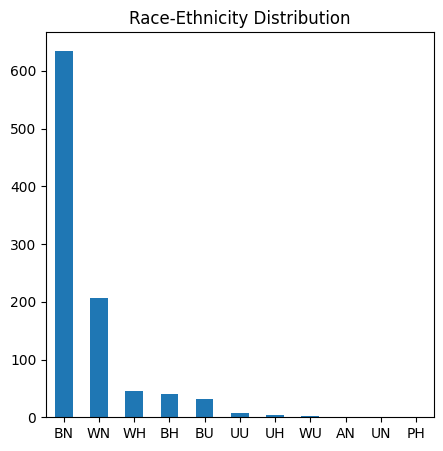

In [18]:
gender_fios['Race-Ethnicity'].value_counts().plot.bar(figsize=(5,5),rot=0,title='Race-Ethnicity Distribution')

In [5]:
ReasonLocation = pd.read_csv("Reason-Location-CreatorID.csv")
ReasonLocation.head()

,Casenum,Desc,StreetNum,StreetName,StreetSuf,Jur,City,State,CreatedById
0,16-3-FI,Suspicious Person,147.0,FLORENCE,ST,BRO,BROCKTON,MA,535
1,16-1-FI,Police Information,692.0,N MAIN,ST,BRO,BROCKTON,MA,560
2,16-2-FI,Police Information,385.0,WESTGATE,DR,BRO,BROCKTON,MA,548
3,16-4-FI,Suspicious Activity,1300.0,MAIN,ST,BRO,BROCKTON,MA,535
4,16-5-FI,UNLAWFUL POSSESION FIREARM,73.0,N WARREN,AVE,BRO,BROCKTON,MA,407


In [6]:
ReasonLocation['Desc'].value_counts()

Police Information                                         230
Suspicious Vehicle                                         175
Suspicious Activity                                        133
Suspicious Person                                           86
Other                                                       50
                                                          ... 
Suspicious Activity - CRUISING YASSO AT 0300HRS              1
VIOLENT OFFENDER FROM FLORIDA                                1
CARRYING LARGE KNIFE                                         1
ATTACHED PLATES OUTSIDE MICHAEL VEIGA'S HOUSE                1
Police Information (SHOTS FIRED THE BROCKTON MINI MART)      1
Name: Desc, Length: 165, dtype: int64

In [6]:
from datetime import datetime

d = datetime.strptime("20161121", "%Y%m%d")
d.strftime('%b')

FIOs['Year'] = FIOs['CreatedDate'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").strftime('%Y'))
FIOs['Month'] = FIOs['CreatedDate'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").strftime('%b'))
FIOs['Day'] = FIOs['CreatedDate'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").strftime('%d'))


In [7]:
FIOs.head()

,FieldNum,GangRelatedYN,CreatedDate,CreatedTime,CreatedID,Year,Month,Day
0,16-3-FI,N,20160112,836,535,2016,Jan,12
1,16-1-FI,N,20160109,924,483,2016,Jan,09
2,16-2-FI,N,20160111,1541,548,2016,Jan,11
3,16-4-FI,N,20160114,1703,535,2016,Jan,14
4,16-5-FI,Y,20160118,2249,407,2016,Jan,18


['2016', '2017', '2018', '2019', '2020', '2021']


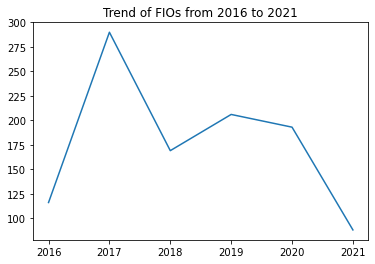

In [8]:
year_counts = FIOs['Year'].value_counts()

years_sorted = sorted(year_counts.keys())
print(years_sorted)

plt.figure()
plt.plot(years_sorted, [year_counts[n] for n in years_sorted])
plt.title('Trend of FIOs from 2016 to 2021')
plt.show()

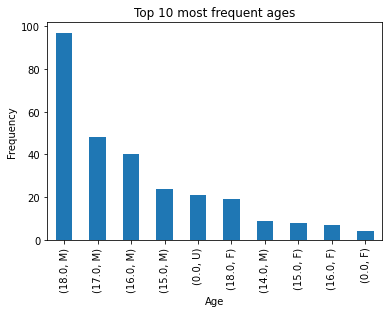

In [9]:
plt.figure()
GenderRace[GenderRace['Age'] <= 18.0][['Age','Sex']].value_counts().nlargest(10).plot.bar()
plt.title('Top 10 most frequent ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:title={'center':'Distribution of juveniles by gender'}, xlabel='Age'>

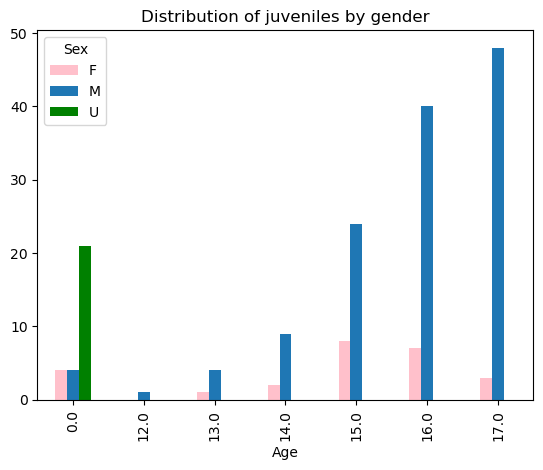

In [31]:
juveniles_genders = GenderRace[GenderRace['Age'] <= 17.0].groupby(by=['Age','Sex']).size()
juveniles_genders.unstack().plot(kind='bar',title="Distribution of juveniles by gender",color=['pink','#1f77b4','green'])

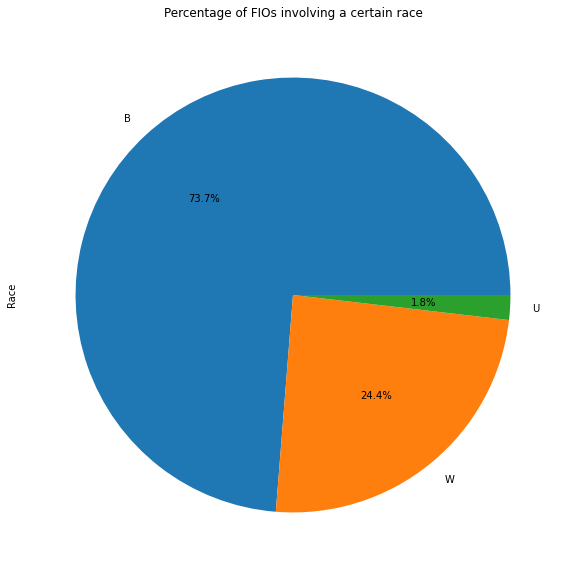

In [11]:
plt.figure(figsize=(10,10))
GenderRace['Race'].value_counts().nlargest(3).plot.pie(autopct='%.1f%%')
plt.title("Percentage of FIOs involving a certain race")
plt.show()
